# Testeando y tuneando los diferentes modelos

Descargamos las librerías necesarias

In [55]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, recall_score, roc_curve, auc, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, recall_score, roc_curve, auc, accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.metrics import precision_score

In [36]:
df = pd.read_excel("Pruebita4 con mas variables Binario_2eq.xlsx")
df.sample(10)

,date,home_team,away_team,home_score,away_score,Competicion Valoracion,Condicion A,Condicion B,Resultado Home,Dif Goles Home,...,M a M Dif Gol Hist Home,M a M Dif Gol Hist Away,Perfor 5 Años Home,Perfor 5 Años Away,Perfor 10 Años Home,Perfor 10 Años Away,M a M Com > 5 Home,M a M Com > 5 Away,Perfor 10 Añ Comp>5 Home,Perfor 10 Añ Comp>5 Away
21044,1998-03-25,4,46,1,2,1,1,-1,-1,-1,...,-8,8,39,57,63,84,0,0,21,38
14974,1988-08-31,131,231,1,1,5,1,-1,0,0,...,-8,8,-8,15,-21,47,-2,2,-6,12
76,1908-02-15,202,93,1,3,4,1,-1,-1,-2,...,-18,18,-4,6,-12,10,0,0,0,0
6097,1966-07-20,4,265,2,1,7,0,0,1,1,...,2,-2,14,3,20,14,0,0,9,6
11084,1980-04-15,121,179,2,4,1,1,-1,-1,-2,...,-6,6,3,7,1,17,-1,1,0,8
12317,1982-12-30,40,283,2,2,1,1,-1,0,0,...,-2,2,-4,7,-6,6,0,0,0,1
34173,2012-08-15,145,297,2,0,1,1,-1,1,2,...,-5,5,0,-1,13,6,-1,1,5,12
21203,1998-06-18,104,246,4,0,7,1,-1,1,4,...,0,0,24,20,39,31,0,0,6,16
17499,1993-04-28,1,301,1,1,5,1,-1,0,0,...,0,0,0,-1,0,-3,0,0,0,-2
32630,2011-01-17,87,148,1,0,1,0,0,1,1,...,5,-5,-6,-14,-7,-8,0,0,-4,-4


In [37]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'Competicion Valoracion', 'Condicion A', 'Condicion B',
       'Resultado Home', 'Dif Goles Home', 'Resultado Away', 'Dif Goles Away ',
       'Dif Gol Acum Home', 'Dif Gol Acum Away', 'Performance Acum Home',
       'Performance Acum Away', 'Perf Home Año', 'Perf Away Año',
       'Dif Gol Año Home', 'Dif Gol Año Away', 'Mano a Mano Home',
       'Mano a Mano Away', 'Target Binario Equip A', 'Target Binario Equip B',
       'Dif Gol Acum a fecha Home', 'Dif Gol Acum a fecha Away',
       'Mano a Mano Histórico Home', 'Mano a Mano Histórico Away',
       'M a M = Cond 10 años Home', 'M a M = Cond 10 años Away',
       'M a M Dif Gol Hist Home', 'M a M Dif Gol Hist Away',
       'Perfor 5 Años Home', 'Perfor 5 Años Away', 'Perfor 10 Años Home',
       'Perfor 10 Años Away', 'M a M Com > 5 Home', 'M a M Com > 5 Away',
       'Perfor 10 Añ Comp>5 Home ', 'Perfor 10 Añ Comp>5 Away'],
      dtype='object')

In [38]:
df.columns = ['fecha', 'equipo_a', 'equipo_b', 'goles_a',
        'goles_b', 'valor_competicion', 'condicion_a', 'condicion_b',
       'resultado_a', 'diferencia_gol_a', 'resultado_b', 'diferencia_gol_b',
       'Dif Gol Acum Home', 'Dif Gol Acum Away', 'Performance Acum Home',
       'Performance Acum Away', 'Perf Home Año', 'Perf Away Año',
       'Dif Gol Año Home', 'Dif Gol Año Away', 'Mano a Mano Home',
       'Mano a Mano Away', 'TargetA','TargetB','Dif Gol Acum a fecha Home',
       'Dif Gol Acum a fecha Away', 'Mano a Mano Histórico Home',
       'Mano a Mano Histórico Away', 'M a M = Cond 10 años Home',
       'M a M = Cond 10 años Away', 'M a M Dif Gol Hist Home',
       'M a M Dif Gol Hist Away', 'Perfor 5 Años Home', 'Perfor 5 Años Away',
       'Perfor 10 Años Home', 'Perfor 10 Años Away', 'M a M Com > 5 Home',
       'M a M Com > 5 Away', 'Perfor 10 Añ Comp>5 Home ',
       'Perfor 10 Añ Comp>5 Away']

## Verificamos relación entre variables con el target

In [10]:
cols =['equipo_a',
 'equipo_b',
 'resultado_a',
 'resultado_b',
 'Perf Home Año',
 'Perf Away Año',
 'M a M = Cond 10 años Home',
 'M a M = Cond 10 años Away',
 'M a M Dif Gol Hist Home',
 'M a M Dif Gol Hist Away',
 'Perfor 5 Años Home', 'Perfor 5 Años Away',
 'Dif Gol Acum a fecha Home',
 'Dif Gol Acum a fecha Away',
 'M a M Com > 5 Home',
 'M a M Com > 5 Away','TargetA','TargetB']

## Comenzamos con un HeatMap para verificar las correlaciones

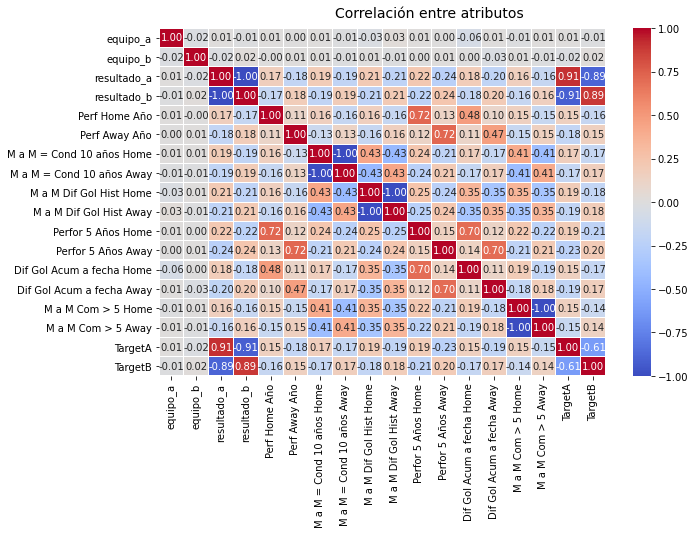

In [11]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df[cols].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlación entre atributos', fontsize=14)

### Identificamos mayor relación en las variables de Performance y generamos nuevas variables exponenciales ponderando a las originales según las distancia en fechas al evento en análisis

In [39]:
df['año_home'] = df['Perf Home Año']**4
df['año_away'] = df['Perf Away Año']**4
df['5años_Home'] = df['Perfor 5 Años Home']**3
df['5años_Away'] = df['Perfor 5 Años Away']**3
df['10años_Home'] = df['Perfor 10 Años Home']**2
df['10años_Away'] = df['Perfor 10 Años Away']**2

### Realizamos un Pairplot con las variables que detallan relaciones entre los equipos intervinientes en el evento a analizar

In [13]:
cols_2 = ['fecha','equipo_a', 'equipo_b','resultado_a','M a M = Cond 10 años Home',
       'M a M Dif Gol Hist Home']

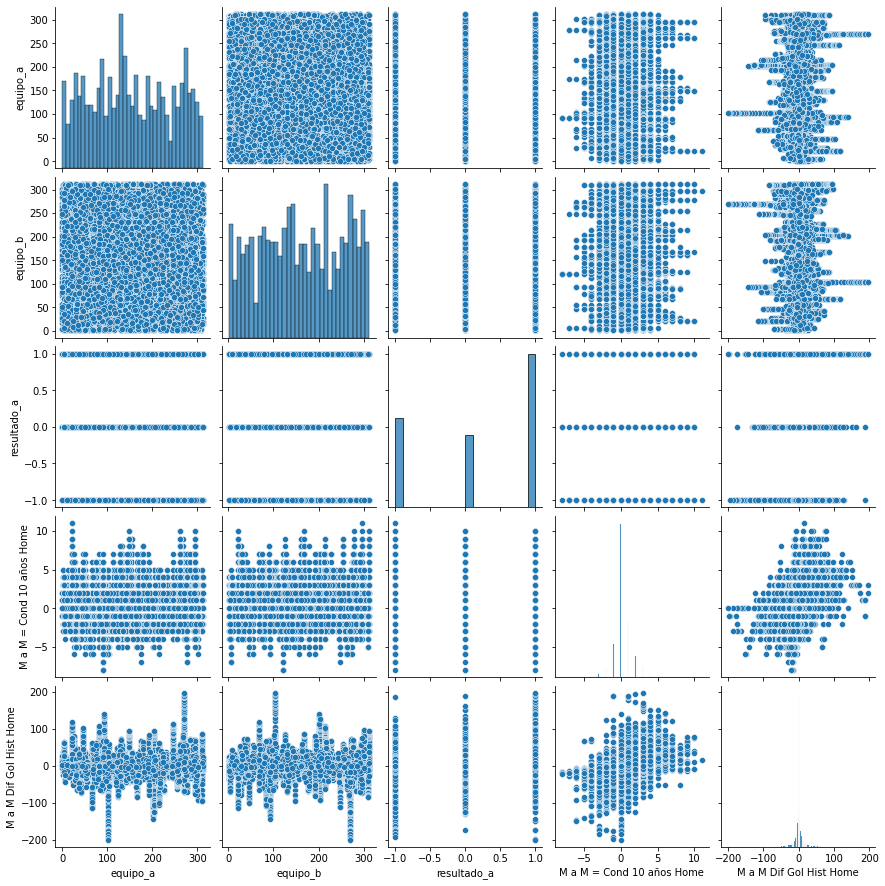

In [14]:
sns.pairplot(df[cols_2])

### Un Countplot identificando las proporciones de resultados para los equipos A (Usualmente en condición de local)

Referencias
"-1" Derrota
"0" Empate
"1" Victoria

<AxesSubplot:xlabel='resultado_a', ylabel='count'>

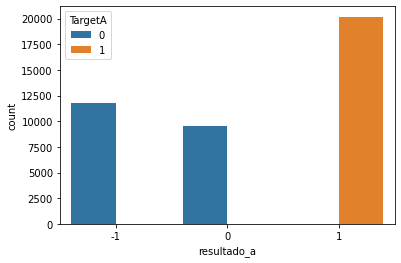

In [15]:
sns.countplot(x='resultado_a',hue="TargetA",data=df)

## Generamos un nuevo HeatMap incluyendo las variables exponenciales generadas tras el primer análisis

In [40]:
cols_3 =['equipo_a','equipo_b','año_home','año_away','5años_Home','5años_Away','10años_Home','10años_Away',
 'resultado_a',
 'resultado_b',
 'M a M = Cond 10 años Home',
 'M a M = Cond 10 años Away',
 'M a M Dif Gol Hist Home',
 'M a M Dif Gol Hist Away',
 'Dif Gol Acum a fecha Home',
 'Dif Gol Acum a fecha Away',
 'M a M Com > 5 Home',
 'M a M Com > 5 Away','TargetA','TargetB']

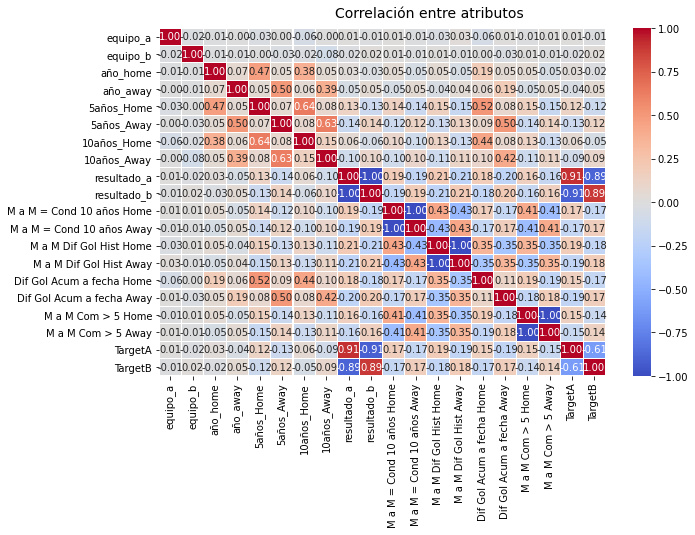

In [41]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df[cols_3].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlación entre atributos', fontsize=14)

Identificamos que las variables exponenciales pierden peso en las correlaciones. Desestimamos avanzar con su utilización.

## Comenzamos a evaluar modelos para definir uno a utilizar 

In [43]:
train_cols = ['equipo_a', 'equipo_b','valor_competicion', 'condicion_a', 'condicion_b',
       'Perf Home Año', 'Perf Away Año',
       'Dif Gol Año Home', 'Dif Gol Año Away', 'Mano a Mano Home',
       'Mano a Mano Away','Dif Gol Acum a fecha Home',
       'Dif Gol Acum a fecha Away', 'Mano a Mano Histórico Home',
       'Mano a Mano Histórico Away', 'M a M = Cond 10 años Home',
       'M a M = Cond 10 años Away', 'M a M Dif Gol Hist Home',
       'M a M Dif Gol Hist Away', 'Perfor 5 Años Home', 'Perfor 5 Años Away',
       'Perfor 10 Años Home', 'Perfor 10 Años Away', 'M a M Com > 5 Home',
       'M a M Com > 5 Away', 'Perfor 10 Añ Comp>5 Home ',
       'Perfor 10 Añ Comp>5 Away']
X = df[train_cols]
y = df['TargetA']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [46]:
cv = KFold(n_splits=3, random_state=10, shuffle=True)

In [47]:
def evaluar_rendimiento(modelo, nombre):
    s = cross_val_score(modelo, X, y, cv=cv, n_jobs=-1,scoring='precision')
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

In [50]:
clf = LogisticRegression(C=1e10)
dt = DecisionTreeClassifier(class_weight='balanced')
bdt = BaggingClassifier(DecisionTreeClassifier())
rf = RandomForestClassifier(class_weight='balanced')
et = ExtraTreesClassifier(class_weight='balanced')
KNC = KNeighborsClassifier()


#evaluar_rendimiento(clf,  "Regresión Lógistica")
evaluar_rendimiento(clf,  "Regresion Logistica")
evaluar_rendimiento(dt,  "Árbol de decisión")
evaluar_rendimiento(bdt, "Bagging AD")
evaluar_rendimiento(rf,  "Random Forest")
evaluar_rendimiento(et,  "Extra Trees")
evaluar_rendimiento(KNC,"KNeighbors")

Rendimiento de Regresion Logistica:	0.65 ± 0.008
Rendimiento de Árbol de decisión:	0.567 ± 0.006
Rendimiento de Bagging AD:	0.643 ± 0.01
Rendimiento de Random Forest:	0.66 ± 0.011
Rendimiento de Extra Trees:	0.662 ± 0.008
Rendimiento de KNeighbors:	0.597 ± 0.008


## Random Forest 

In [52]:
rf = RandomForestClassifier(n_estimators = 1000,
            max_depth    = 15,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 100)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=1000, n_jobs=-1,
                       random_state=100)

In [53]:
rf_pred = rf.predict(X_test)
print(accuracy_score(y_test,rf_pred))
print(recall_score(y_test,rf_pred))
print(precision_score(y_test,rf_pred))

0.675036496350365
0.6593059936908517
0.6677316293929713


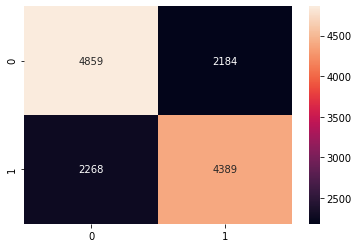

In [54]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, rf_pred)
sns.heatmap(confusion,annot=True,fmt='g')
plt.show()

In [56]:
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }

In [57]:
from sklearn.model_selection import RepeatedKFold

In [58]:
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=123),
             estimator=RandomForestClassifier(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 10, 20],
                         'max_features': [5, 7, 9], 'n_estimators': [150]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [59]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
6,10,5,150,-0.578832,0.006070,-0.485865,0.001825
7,10,7,150,-0.578961,0.005567,-0.479321,0.001840
8,10,9,150,-0.578968,0.005891,-0.474454,0.002001
0,None,5,150,-0.581245,0.006464,-0.037479,0.001883


In [60]:
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

{'max_depth': 10, 'max_features': 5, 'n_estimators': 150} : -0.5788319895778541 neg_root_mean_squared_error


In [61]:
rf_mejorado = RandomForestClassifier(n_estimators = 150,
            max_depth    = 10,
            max_features = 5,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123)
rf_mejorado.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=5, n_estimators=150,
                       n_jobs=-1, random_state=123)

In [62]:
rf_pred_mj = rf_mejorado.predict(X_test)
print(accuracy_score(y_test,rf_pred_mj))
print(recall_score(y_test,rf_pred_mj))
print(precision_score(y_test,rf_pred_mj))

0.6742335766423357
0.6558509839266937
0.6677883144692567


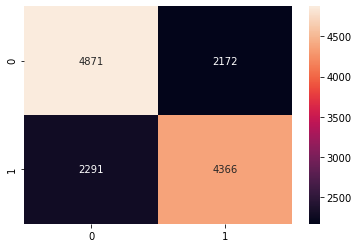

In [63]:
confusion = confusion_matrix(y_test, rf_pred_mj)
sns.heatmap(confusion,annot=True,fmt='g')
plt.show()

## Si bien RandomForest es el modelo que seleccionamos para trabajar, en otro Notebook incluimos el tuning de GridSearch sobre los hiperparámetros del resto.